In [3]:
import pandas as pd
d=pd.read_csv("unique_columns.csv")
d

,AttrStatus,Changed_water_source,Current_water_source,Diarrhea_2013,GenderFA,HHmembers_12,Ill_days_total,Ill_last_week_,LangFA,LitFA,...,child_weighing_type_,dist1,health_program_,health_worker_visits_check_,same_compound,same_mother,tag_C,tag_HH,vaccine_card_,free_care_check_
0,6.0,0.0,1.0,0.406349,1.0,0.250000,3.0,1.0,1.0,1.0,...,1.0,0.572621,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,6.0,0.0,1.0,0.000000,1.0,0.250000,0.0,0.0,1.0,1.0,...,1.0,0.572621,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,6.0,0.0,1.0,0.000000,1.0,0.083333,0.0,0.0,1.0,1.0,...,1.0,0.609814,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,6.0,0.0,1.0,0.000000,1.0,0.405786,0.0,0.0,1.0,1.0,...,1.0,0.609814,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,6.0,0.0,1.0,0.406349,1.0,0.405786,0.0,0.0,1.0,1.0,...,1.0,0.609814,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,2.0,0.0,1.0,0.436529,1.0,0.416667,0.0,0.0,0.0,1.0,...,1.0,0.316324,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1647,6.0,0.0,1.0,0.213333,1.0,0.416667,0.0,0.0,0.0,1.0,...,1.0,0.316324,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1648,6.0,0.0,1.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,...,1.0,-0.183572,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1649,6.0,0.0,1.0,0.406349,0.0,0.333333,0.0,0.0,0.0,0.0,...,1.0,-0.183572,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [4]:
x = d.drop(['free_care_check_'],axis='columns')
y = d['free_care_check_']
y.value_counts()

free_care_check_
0.0    1062
1.0     589
Name: count, dtype: int64

In [5]:
d["Ill_days_total"].value_counts()

Ill_days_total
0.0    1422
1.0      66
2.0      48
7.0      41
3.0      35
4.0      17
5.0      11
6.0      11
Name: count, dtype: int64

In [6]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy="auto",random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)
d_resampled=pd.DataFrame(x_resampled,columns=x.columns)
d_resampled["free_care_check_"] = y_resampled 
d_resampled["free_care_check_"].value_counts()

  File "C:\Users\anusr\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


free_care_check_
0.0    1062
1.0    1062
Name: count, dtype: int64

In [7]:
d_resampled["Ill_days_total"].value_counts()

Ill_days_total
0.000000    1842
1.000000      72
2.000000      52
7.000000      42
3.000000      40
4.000000      18
5.000000      11
6.000000      11
3.157686       1
0.938503       1
2.621227       1
0.662553       1
4.100353       1
5.755647       1
2.501752       1
2.556807       1
1.103390       1
1.987792       1
3.009071       1
1.089529       1
0.951905       1
6.254380       1
5.667184       1
2.712070       1
1.451285       1
0.170836       1
3.215332       1
0.086834       1
2.811204       1
0.961037       1
0.749984       1
2.244542       1
2.361816       1
2.995931       1
1.311970       1
6.339495       1
0.197891       1
0.924565       1
2.057864       1
0.906482       1
1.583361       1
0.014714       1
5.749911       1
0.922679       1
Name: count, dtype: int64

EDA

Univariate Analysis


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

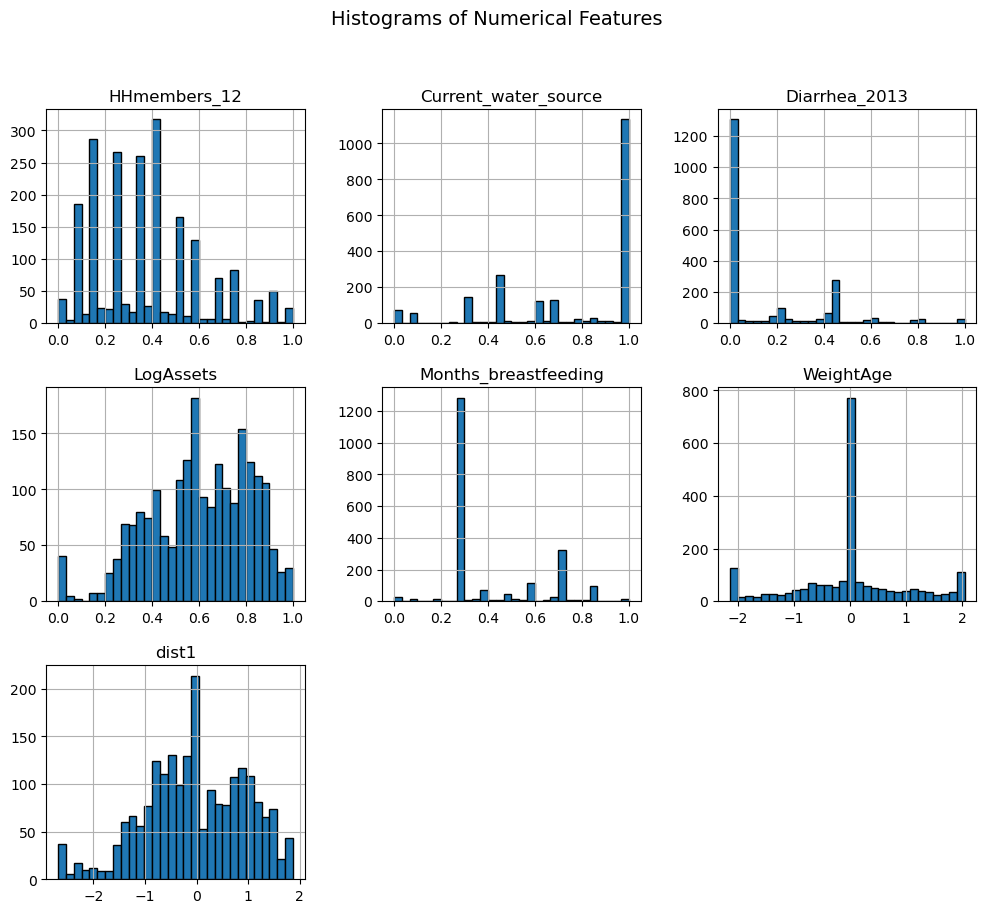

In [11]:
numerical_columns = [
    "HHmembers_12", "Current_water_source","Diarrhea_2013","LogAssets", "Months_breastfeeding","WeightAge", "dist1"]


df_numerical = d_resampled[numerical_columns]


df_numerical.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

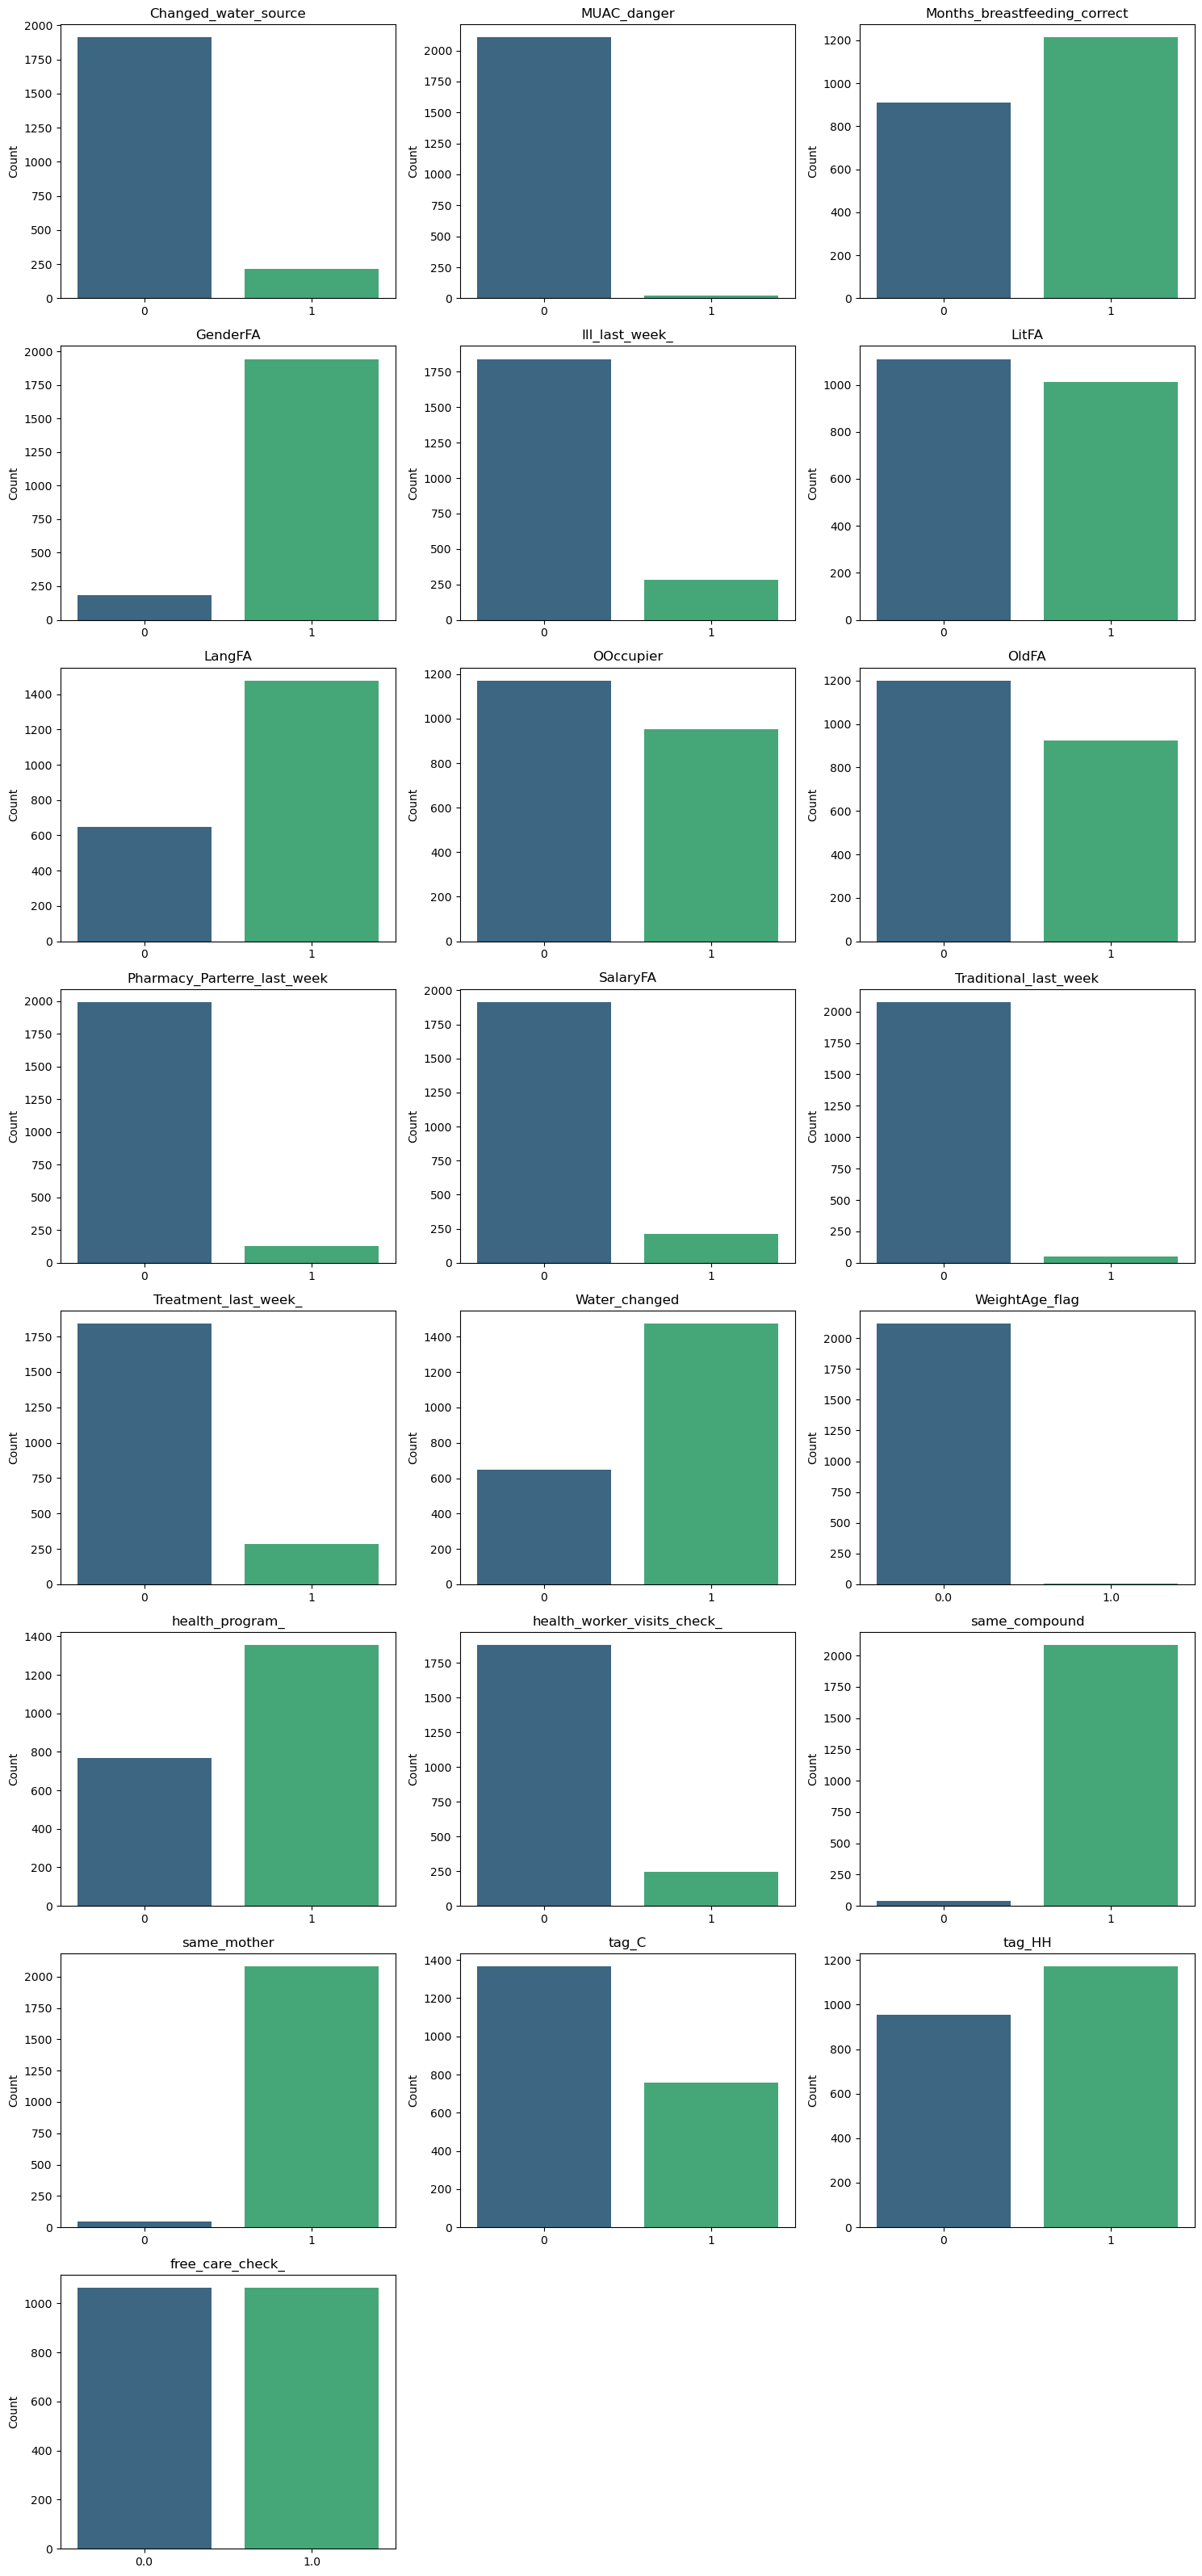

In [12]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
binary_columns = [
    "Changed_water_source","MUAC_danger","Months_breastfeeding_correct","GenderFA", "Ill_last_week_", "LitFA","LangFA", "OOccupier","OldFA","Pharmacy_Parterre_last_week", "SalaryFA", "Traditional_last_week", "Treatment_last_week_",
    "Water_changed", "WeightAge_flag",  "health_program_","health_worker_visits_check_", "same_compound", "same_mother", "tag_C", "tag_HH","free_care_check_"]
n_cols = 3
n_rows = int(np.ceil(len(binary_columns) / n_cols))
plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(binary_columns):
    plt.subplot(n_rows, n_cols, i+1)
    
    
    if not set(d_resampled[col].unique()).issubset({0, 1}):
        data = np.where(d_resampled[col] >= 0.5, 1, 0)
    else:
        data = d_resampled[col]
    
    sns.countplot(x=data,palette='viridis')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

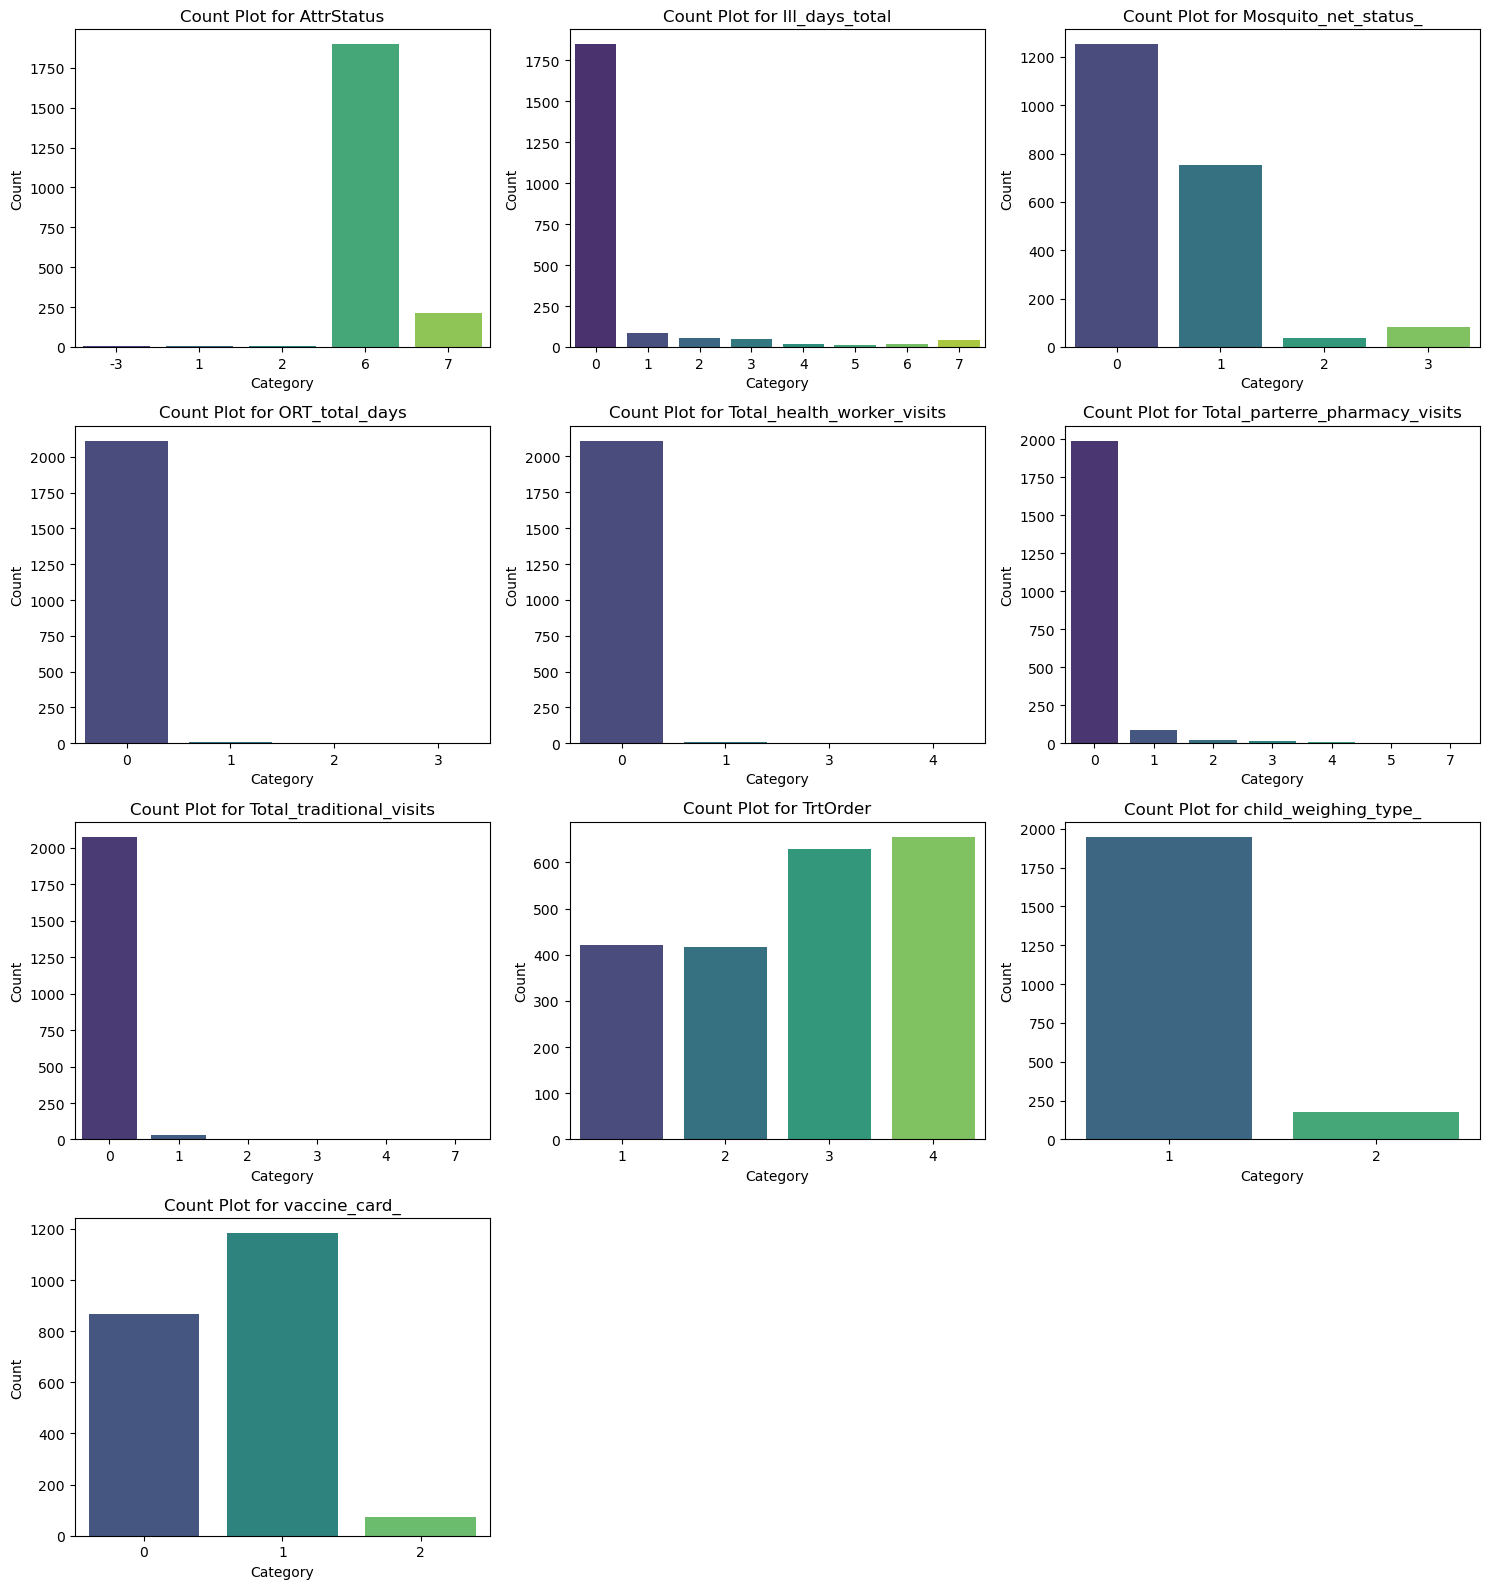

In [13]:
categorical_columns=["AttrStatus","Ill_days_total","Mosquito_net_status_","ORT_total_days","Total_health_worker_visits","Total_parterre_pharmacy_visits","Total_traditional_visits","TrtOrder","child_weighing_type_","vaccine_card_"]
import warnings
warnings.simplefilter("ignore")

n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    
    
    rounded_col = d_resampled[col].round().astype(int)
    
    
    sns.countplot(x=rounded_col, palette='viridis')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Count Plot for {col}')

plt.tight_layout()
plt.show()

Bivariate Analysis


Violin plot

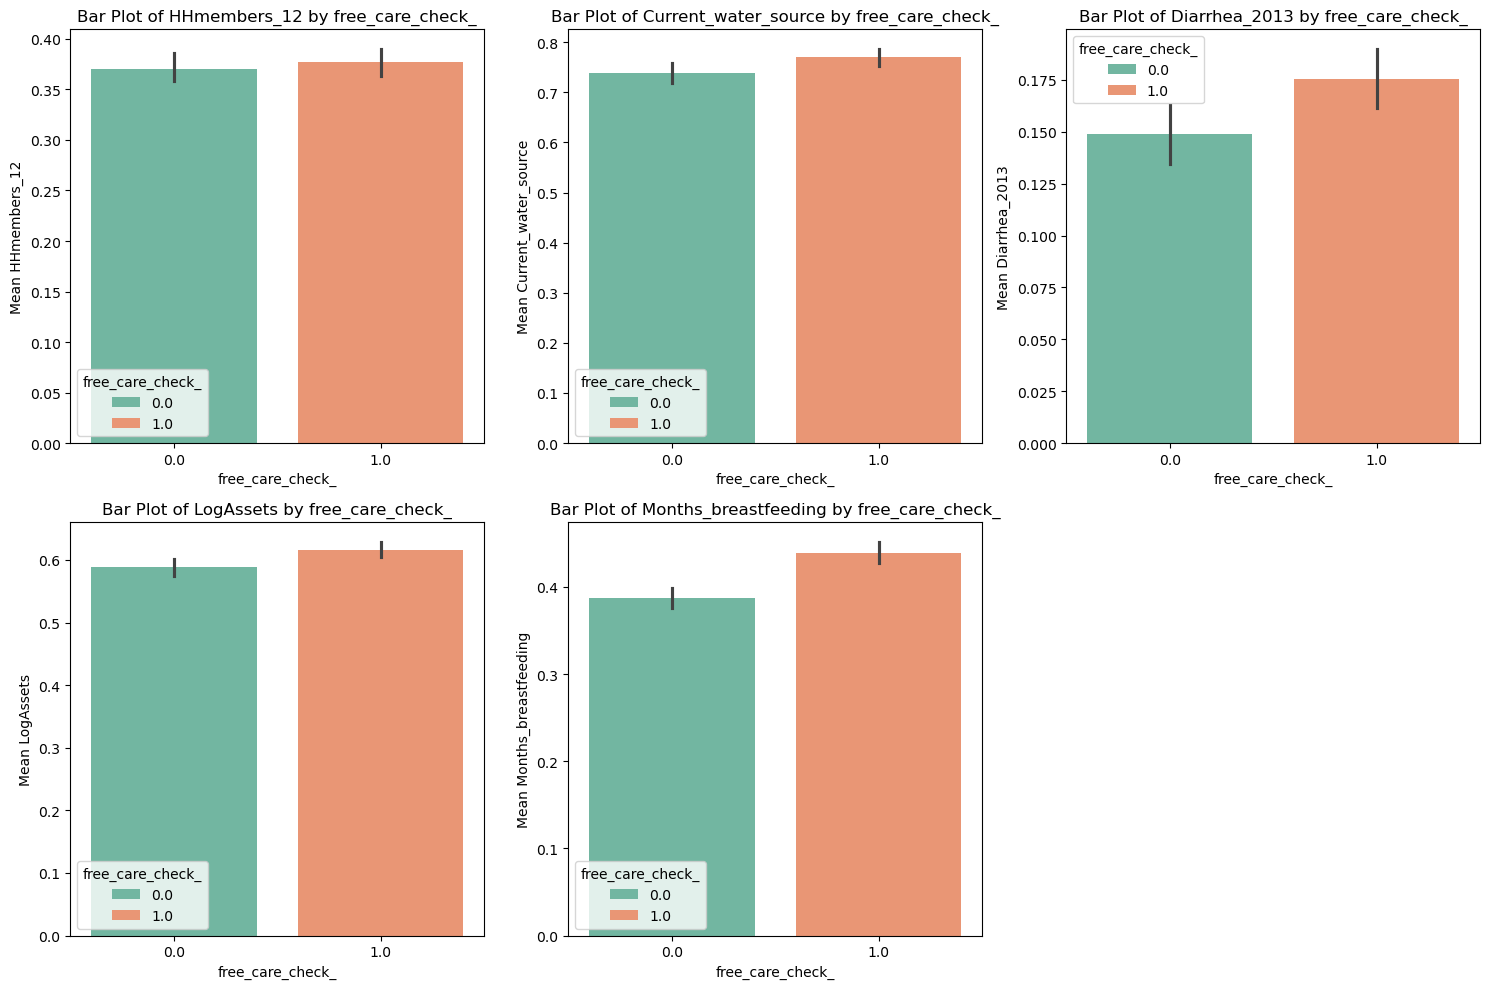

In [16]:
import warnings
warnings.simplefilter("ignore")
binary_col = "free_care_check_" 
numerical_columns = [
    "HHmembers_12", "Current_water_source","Diarrhea_2013","LogAssets", "Months_breastfeeding"]
n_cols = 3  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  


for idx, col in enumerate(numerical_columns):
    ax = axes[idx]  

    
    sns.barplot(x=binary_col, y=col, data=d_resampled, estimator=np.mean, hue=binary_col, palette="Set2", ax=ax)

    
    ax.set_ylim(bottom=0)

    
    ax.set_title(f'Bar Plot of {col} by {binary_col}')
    ax.set_xlabel(binary_col)
    ax.set_ylabel(f'Mean {col}')
    ax.legend(title=binary_col)  


for idx in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[idx])


plt.tight_layout()
plt.show()

[LogAssets,Months_breast_feeding,Diarrhea_2013,current_water_source]

for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # KDE Plot (Density of Numerical Column by Binary Group)
    sns.kdeplot(d_resampled[d_resampled[binary_col] == 0][col], label="Category 0", shade=True, ax=axes[0])
    sns.kdeplot(d_resampled[d_resampled[binary_col] == 1][col], label="Category 1", shade=True, ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col} by {binary_col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Bar Plot (Mean of Numerical Column by Binary Group)
    sns.barplot(x=binary_col, y=col, data=d_resampled, estimator=lambda x: x.mean(), palette="Set3", ax=axes[1])
    axes[1].set_title(f'Bar Plot of {col} by {binary_col}')
    axes[1].set_xlabel(binary_col)
    axes[1].set_ylabel(f'Mean {col}')

    # Ensure bars start at y=0
    min_value, max_value = d_resampled[col].min(), d_resampled[col].max()
    axes[1].set_ylim(0, max_value * 1.1)  

    plt.tight_layout()
    plt.show()

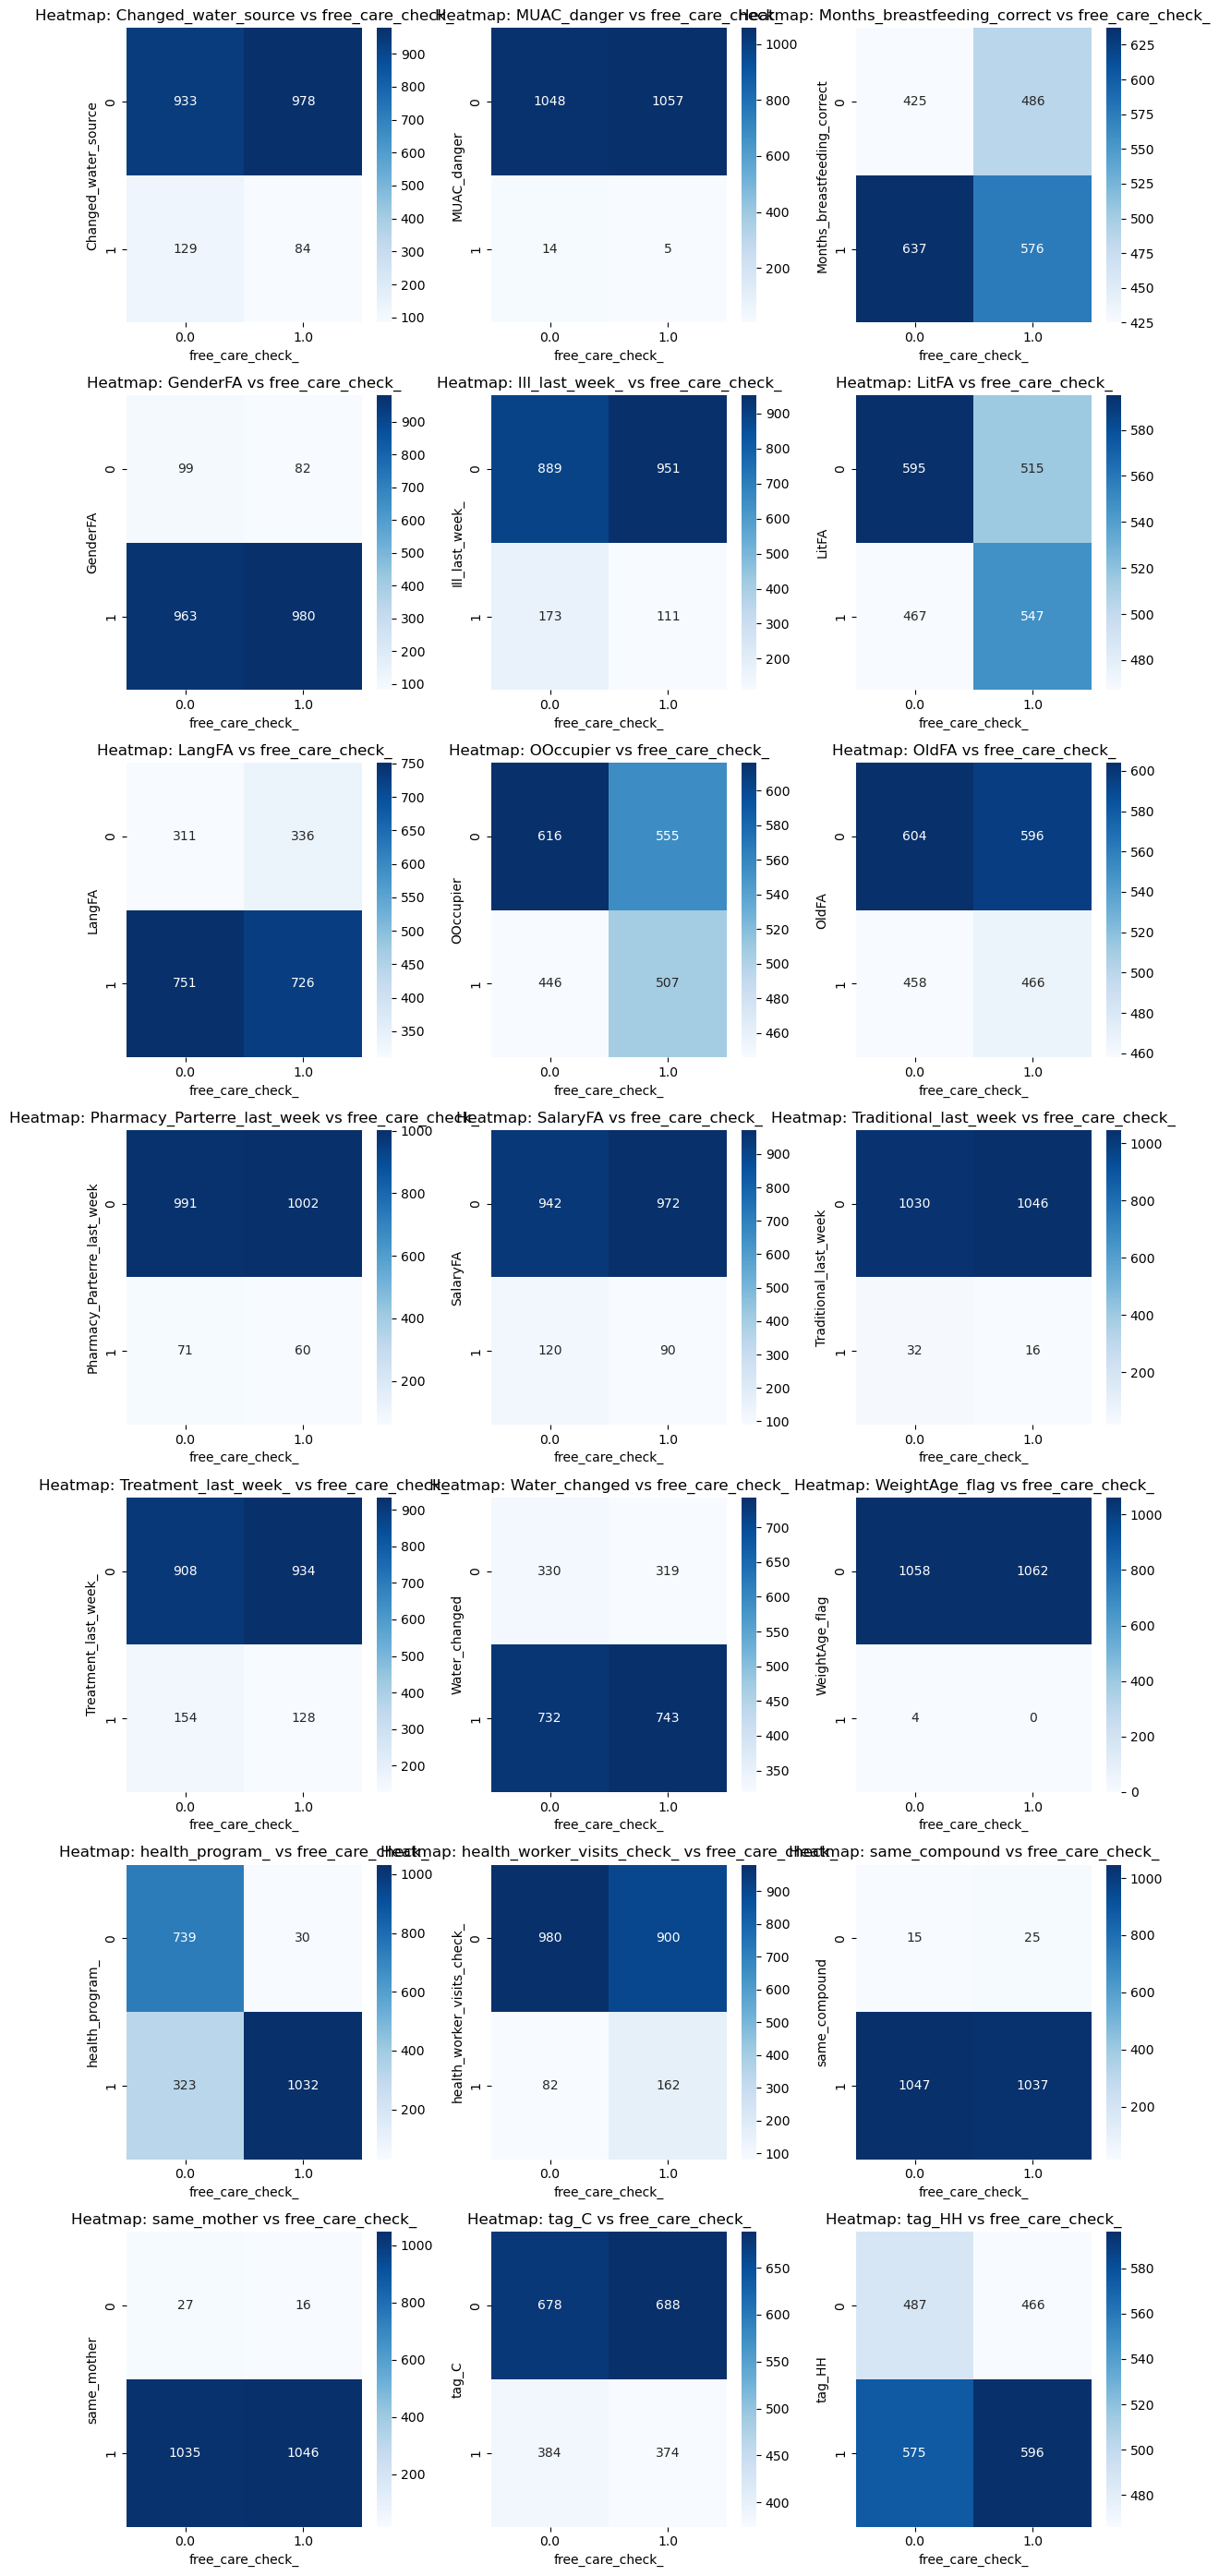

In [19]:
binary_columns = [
    "Changed_water_source", "MUAC_danger", "Months_breastfeeding_correct", 
    "GenderFA", "Ill_last_week_", "LitFA", "LangFA", "OOccupier", "OldFA", 
    "Pharmacy_Parterre_last_week", "SalaryFA", "Traditional_last_week", 
    "Treatment_last_week_", "Water_changed", "WeightAge_flag", "health_program_", 
    "health_worker_visits_check_", "same_compound", "same_mother", "tag_C", "tag_HH", 
    "free_care_check_"
]

for col in binary_columns:
    if col != 'free_care_check_':  
        d_resampled[col] = d_resampled[col].round().astype(int)


n_cols = 3  
n_rows = (len(binary_columns) - 1 + n_cols - 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  


for idx, col in enumerate([c for c in binary_columns if c != 'free_care_check_']):  
    ax = axes[idx]  # Select subplot
    
    
    df_cross = pd.crosstab(d_resampled[col], d_resampled['free_care_check_'])
    
    
    sns.heatmap(df_cross, annot=True, cmap='Blues', fmt='d', ax=ax)
    
    
    ax.set_title(f'Heatmap: {col} vs free_care_check_')
    ax.set_xlabel('free_care_check_')
    ax.set_ylabel(col)


for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

["months_breast_feeding_correct","LitFA","OOccupier",health_program,"tag_HH"]

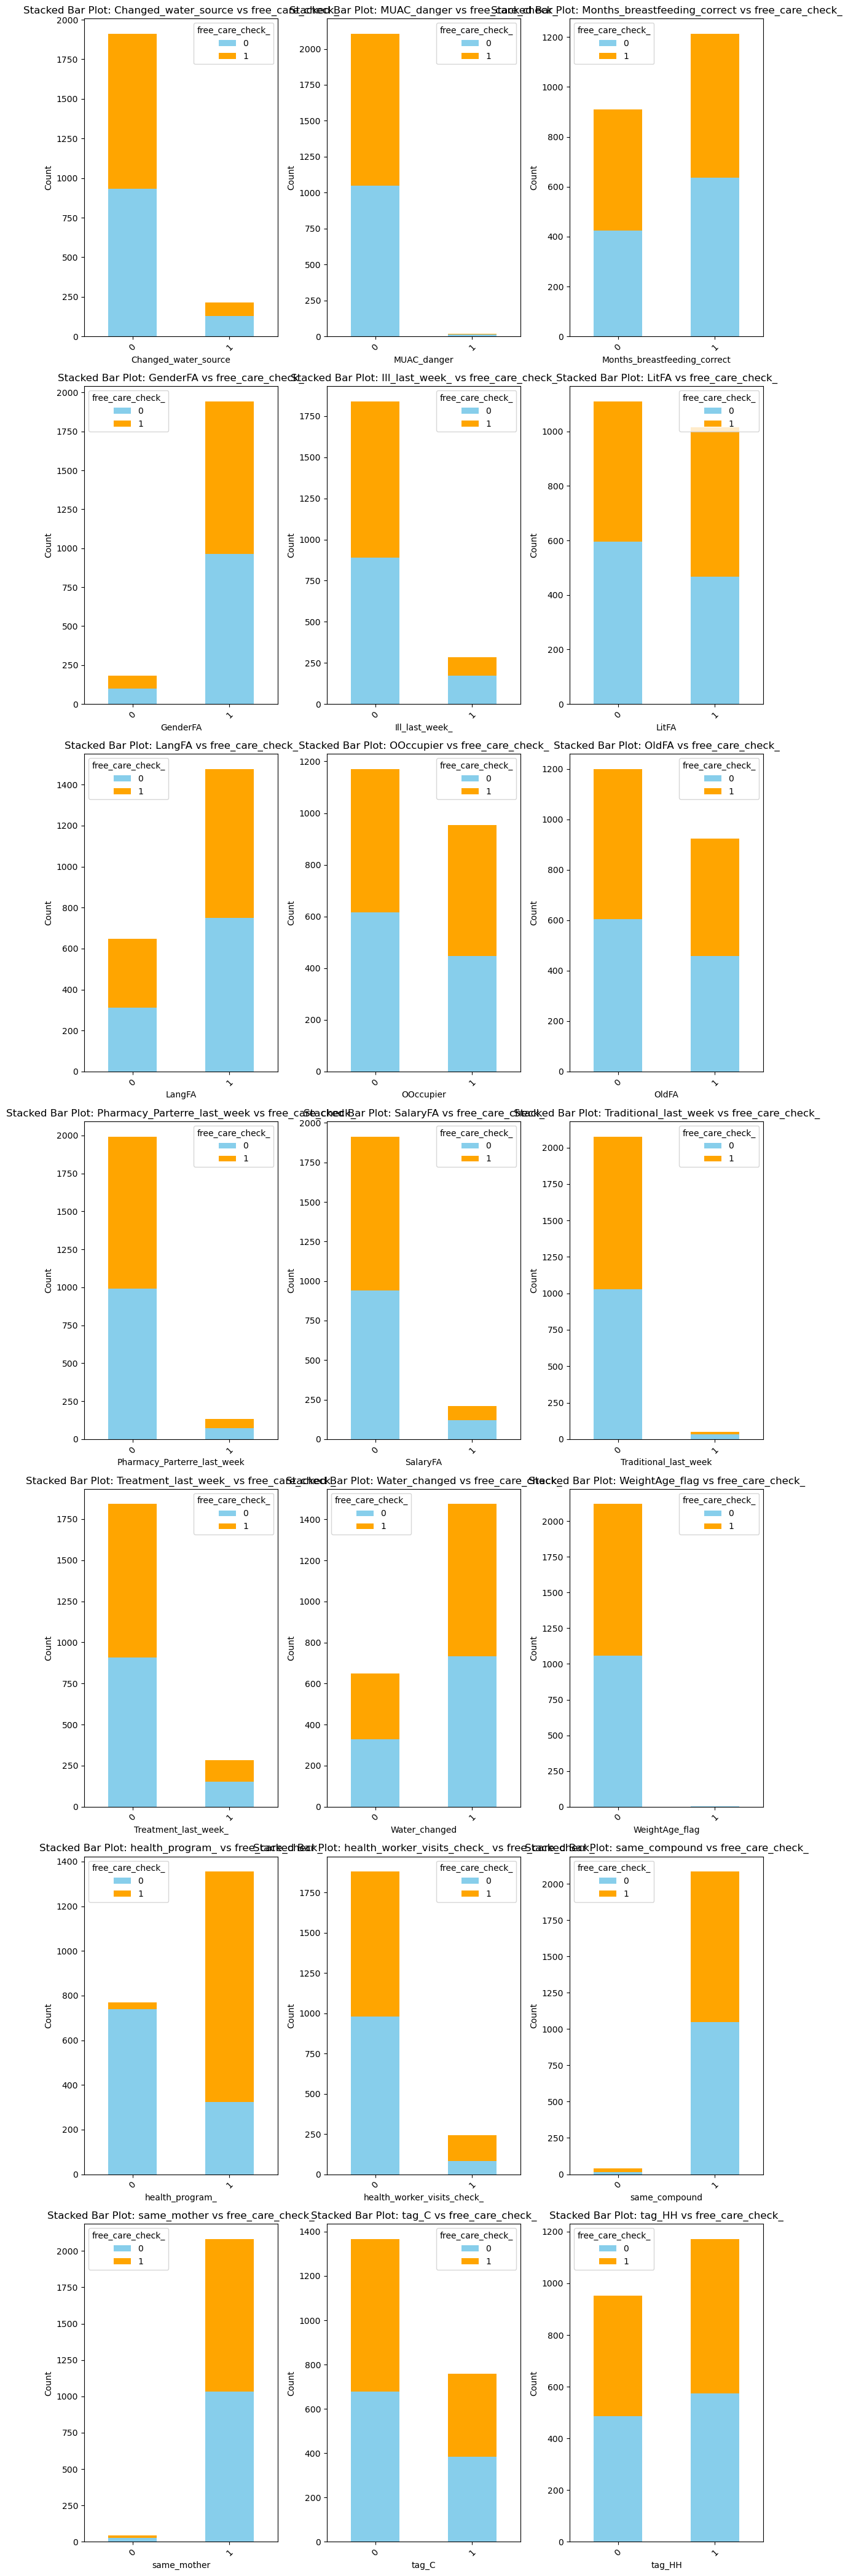

In [21]:

if len(binary_columns) == 0:
    print("Error: binary_columns list is empty.")
else:
    
    for col in binary_columns:
        d_resampled[col] = d_resampled[col].round().astype(int)

    
    binary_columns = binary_columns[:-1]

    
    n_cols = 3  
    n_rows = (len(binary_columns) + n_cols - 1) // n_cols  

    
    if n_rows == 0:
        n_rows = 1  

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))  
    axes = axes.flatten()  

    
    for idx, col in enumerate(binary_columns):  
        ax = axes[idx]
        
        
        crosstab = pd.crosstab(d_resampled[col], d_resampled['free_care_check_'])

        
        crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)
        
        
        ax.set_title(f'Stacked Bar Plot: {col} vs free_care_check_')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  
    
    for idx in range(len(binary_columns), len(axes)):
        axes[idx].axis('off')  # Hide unused axes

    
    plt.tight_layout()
    plt.show()

Health_worker_check and health program,ill_last_week,tag_hh,months_breast_feeding_correct

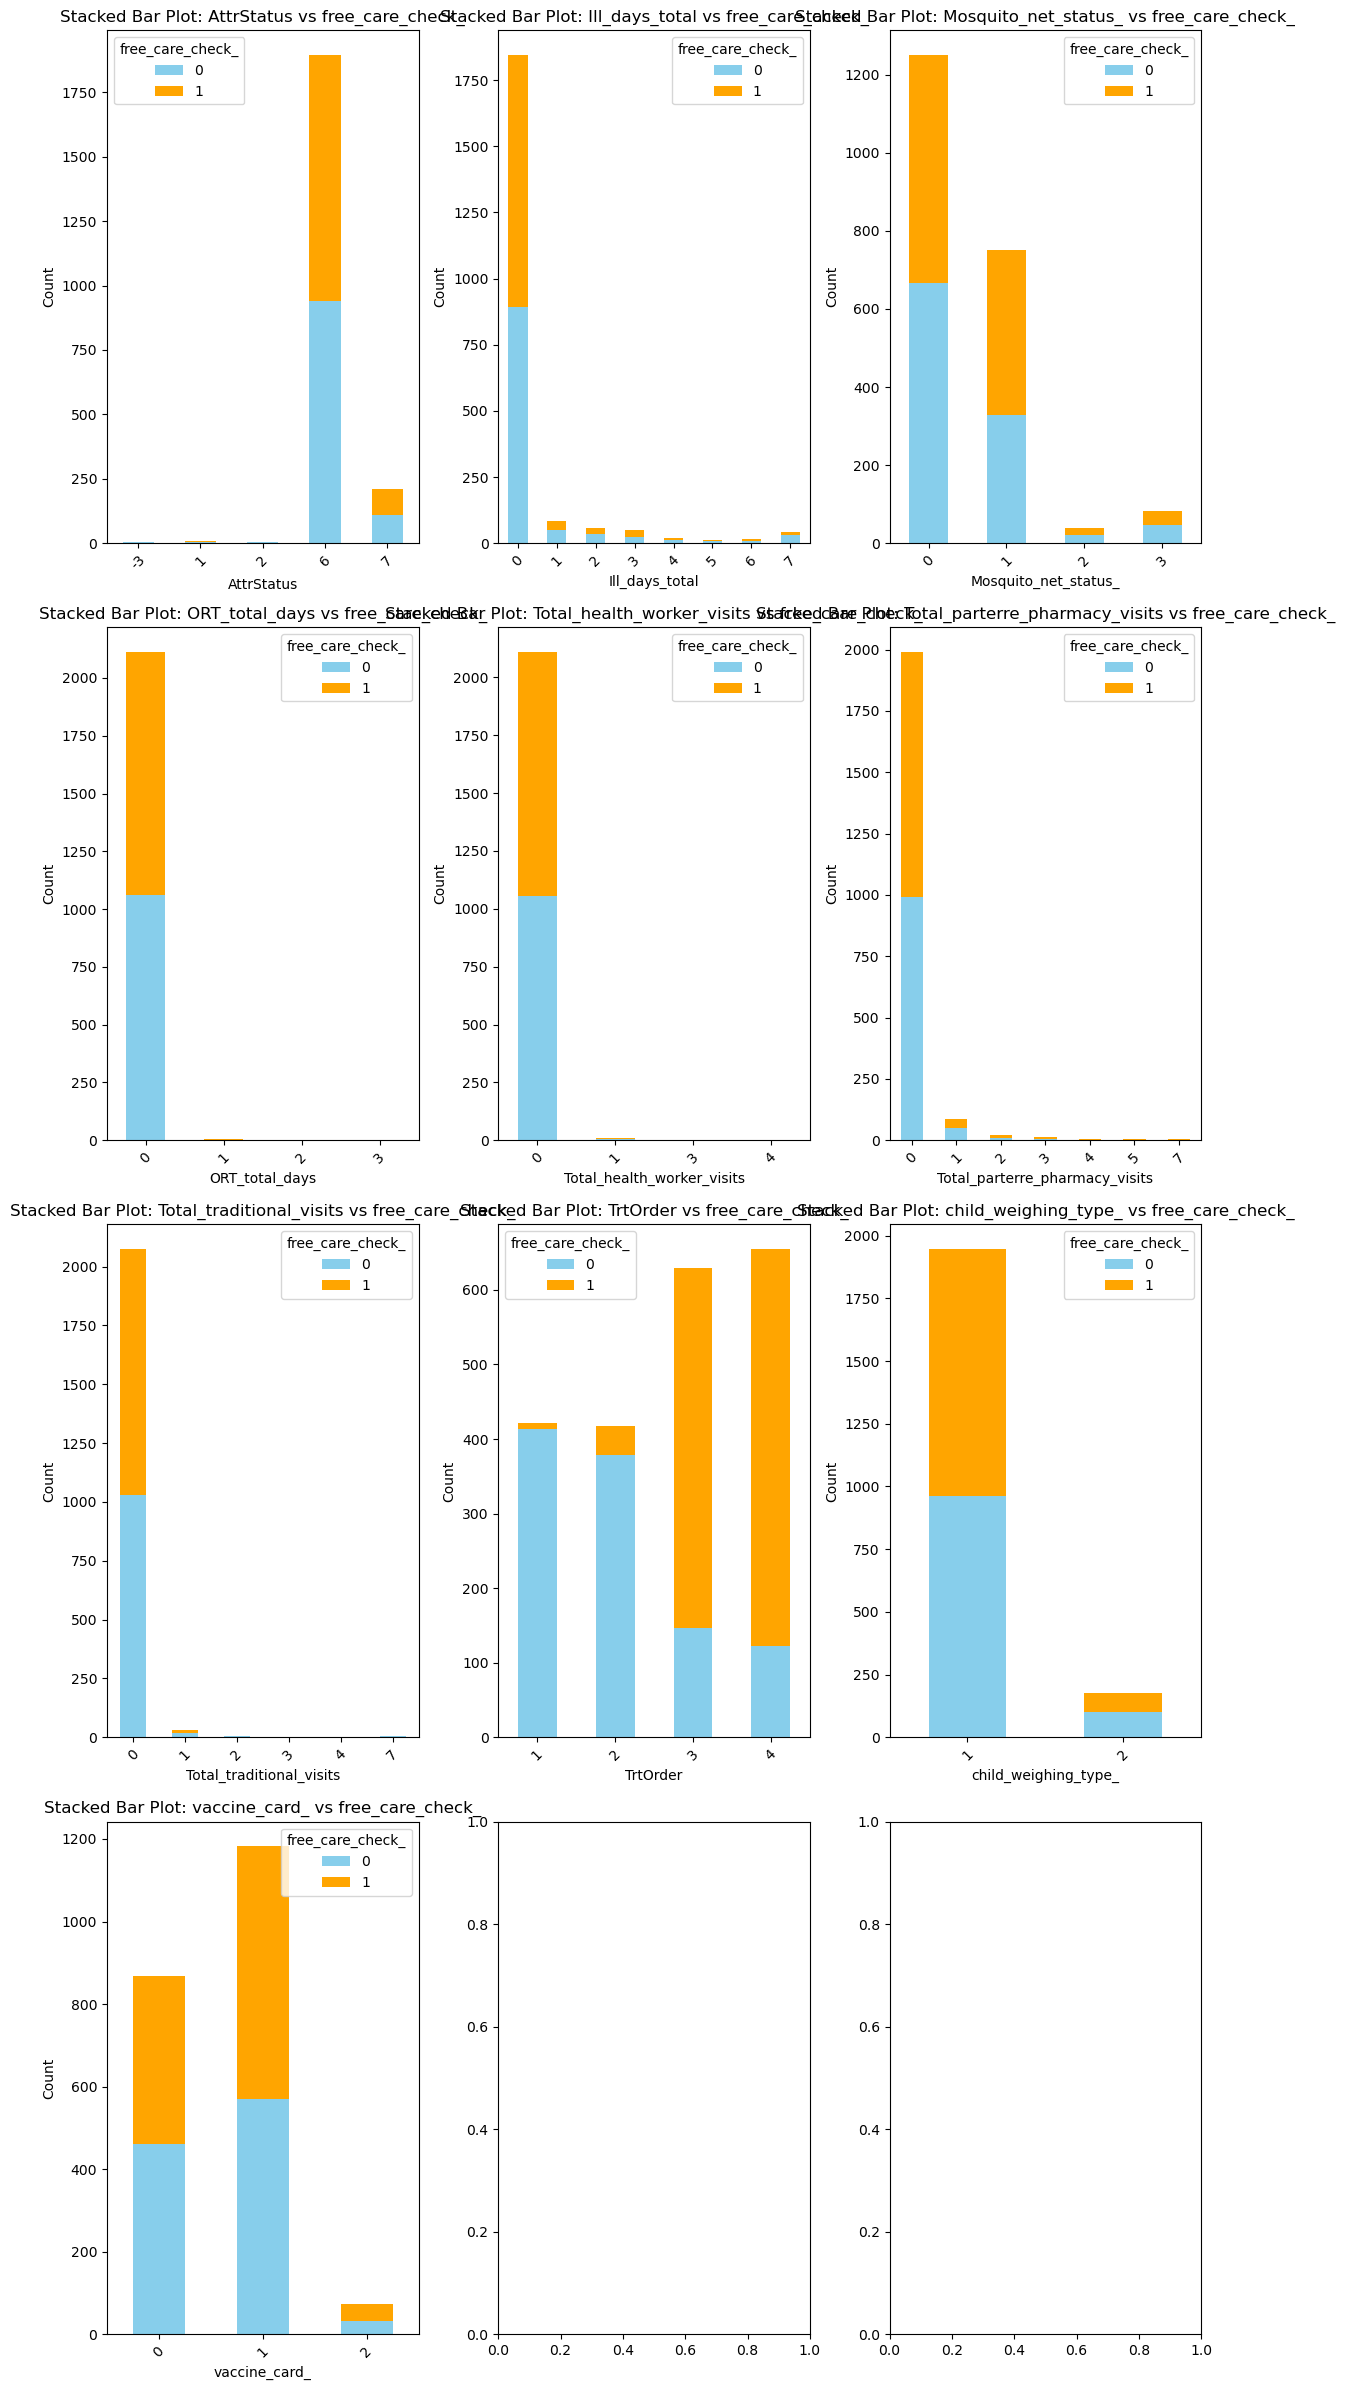

In [23]:
# Round categorical columns if SMOTE produced floats
for col in categorical_columns:
    d_resampled[col] = d_resampled[col].round().astype(int)


n_cols = 3  
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))  
axes = axes.flatten()  


for idx, col in enumerate(categorical_columns):
    ax = axes[idx]
    
    
    crosstab = pd.crosstab(d_resampled[col], d_resampled['free_care_check_'])

    
    crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)
    
    
    ax.set_title(f'Stacked Bar Plot: {col} vs free_care_check_')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  


plt.tight_layout()
plt.show()

[ill_days_total,mosquito_net_status_Trtorder,vaccine_card]

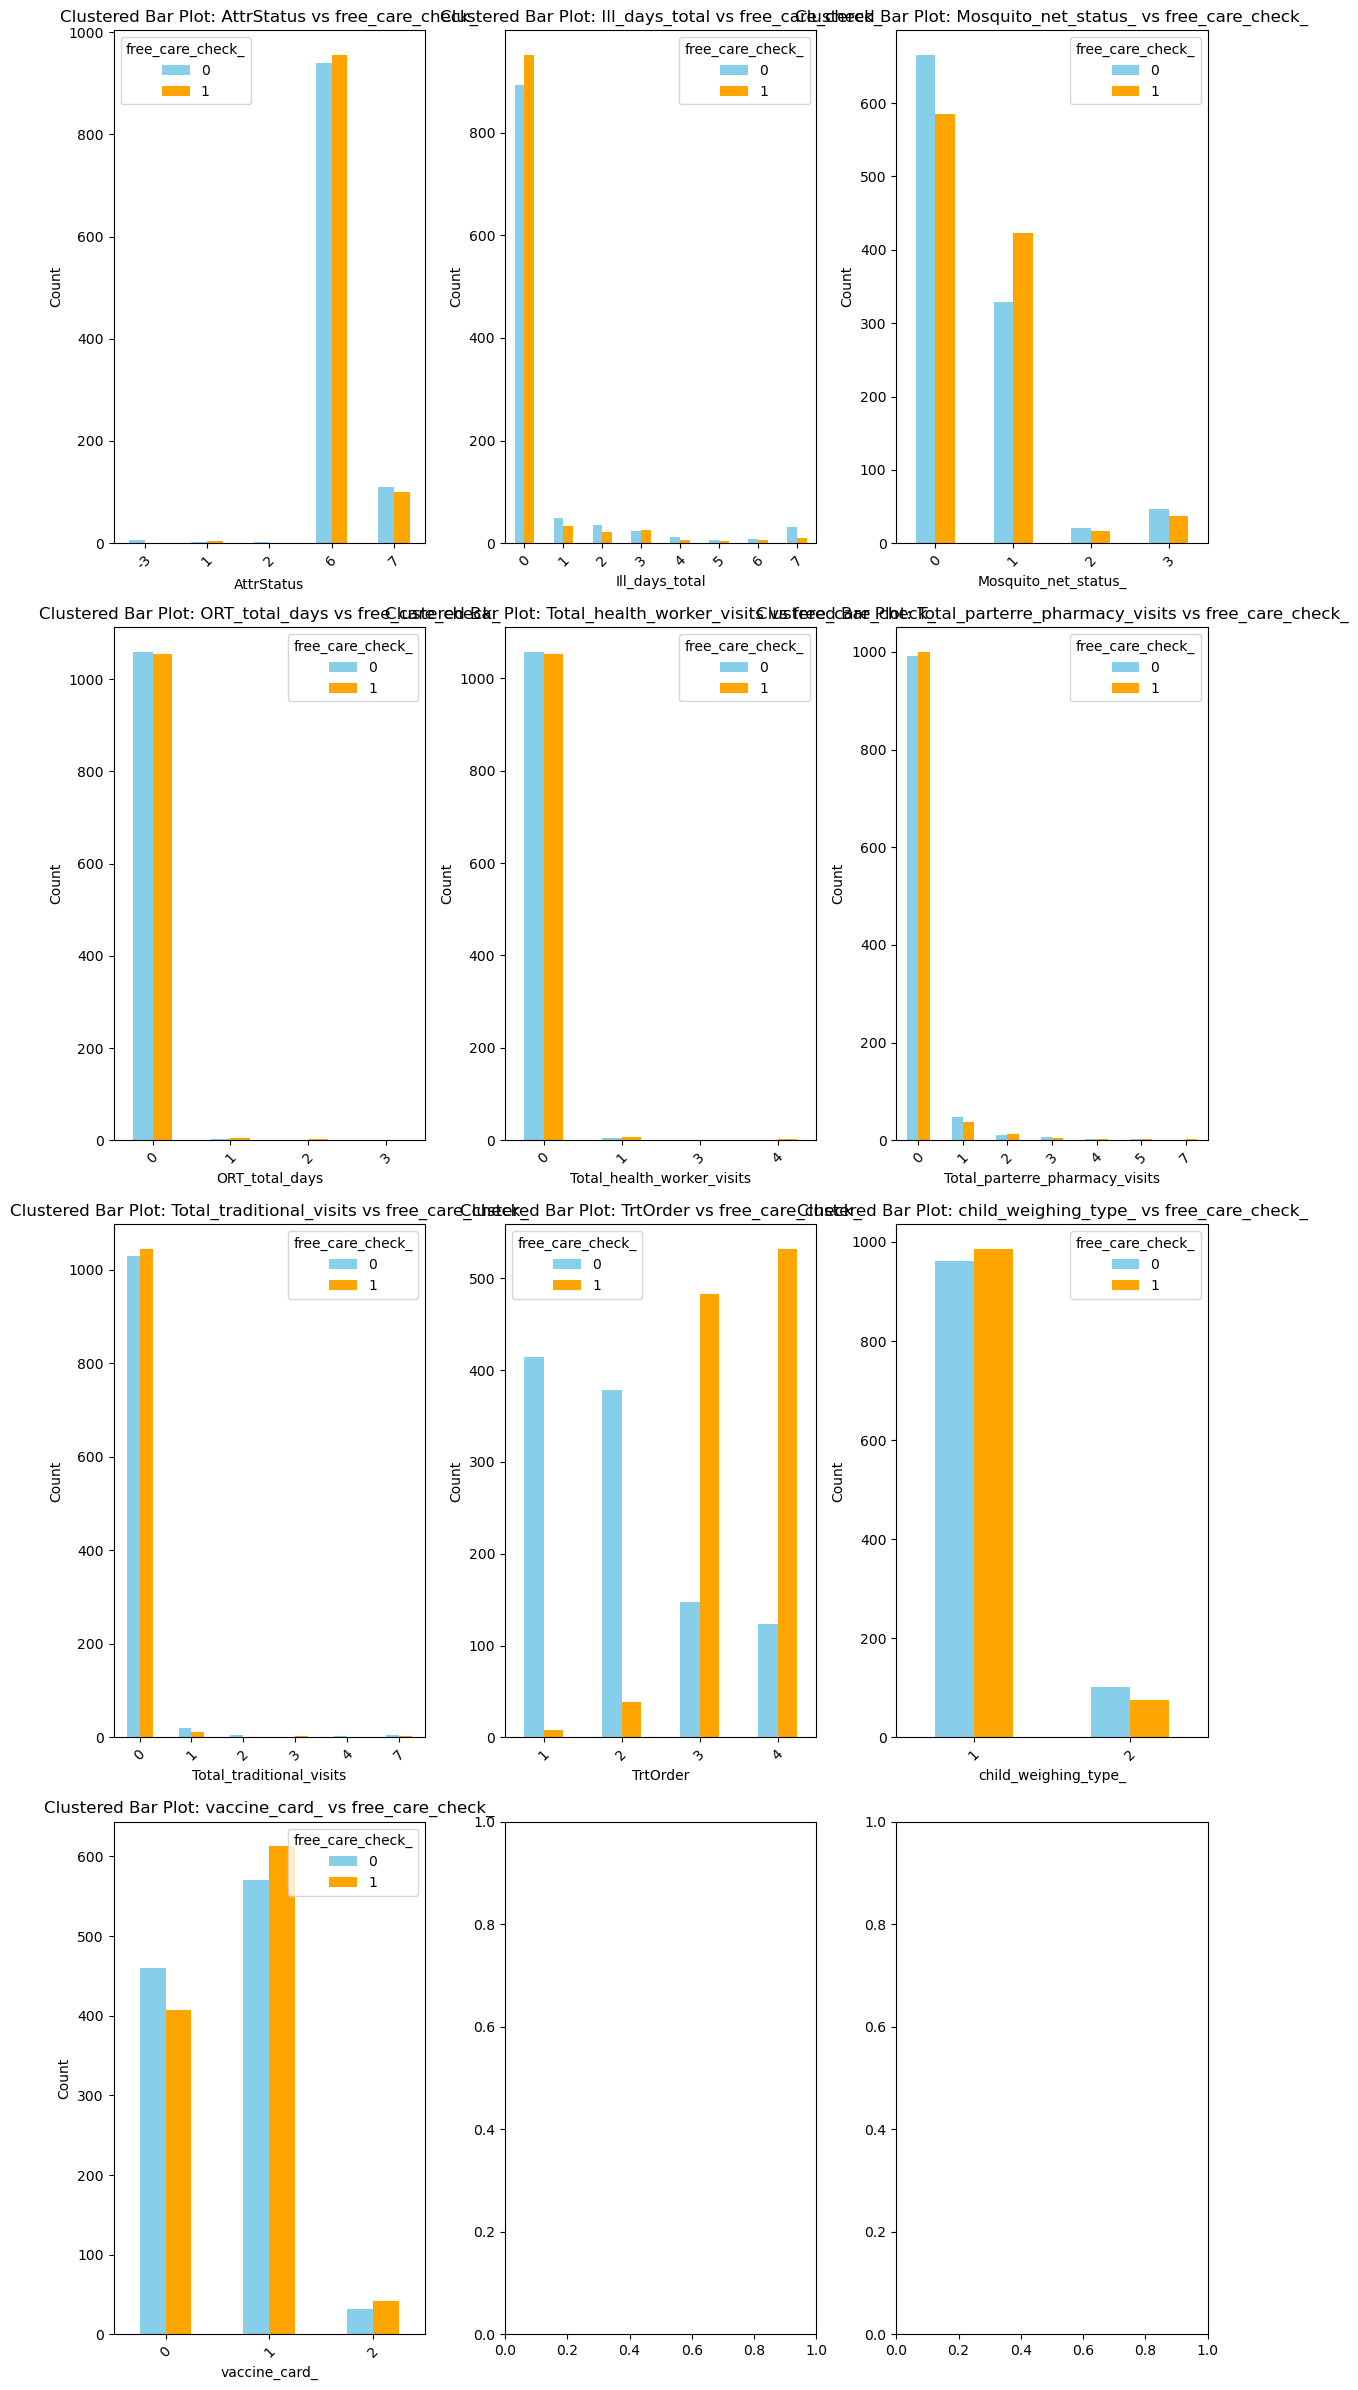

In [25]:


# Round the categorical columns to integers after SMOTE if necessary
for col in categorical_columns:
    d_resampled[col] = d_resampled[col].round().astype(int)


binary_columns = ['free_care_check_']
for col in binary_columns:
    d_resampled[col] = d_resampled[col].apply(lambda x: 0 if x < 0.5 else 1)


n_cols = 3  
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))  
axes = axes.flatten()  


for idx, col in enumerate(categorical_columns):
    ax = axes[idx]
    
    
    crosstab = pd.crosstab(d_resampled[col], d_resampled['free_care_check_'])

    
    crosstab.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], ax=ax)
    
    
    ax.set_title(f'Clustered Bar Plot: {col} vs free_care_check_')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  


plt.tight_layout()
plt.show()


vaccine card, TrtORDER,illdaystotal, mosquito_net_status



# Select only numerical columns for the pairplot
numerical_columns = d_resampled.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot
sns.pairplot(d_resampled[numerical_columns])

# Show the plot
plt.tight_layout()
plt.show()


['TrtOrder', 'dist1', 'vaccine_card_available', 'health_program_',
       'health_worker_provides_', 'ORT_recipe', 'Months_breastfeeding_correct',
       'tag_HH', 'tag_C', 'tag_M', 'free_care_check_']